## Цель: 

**При помощи инструментов машинного обучения спрогнозировать, какой регион будет самым прибыльным.**

## Загрузка и подготовка данных

In [4]:
#загрузим нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
#напишем функцию для получения информации о данных
def get_info_reg(region):
    print('-------------------------------------------------')
    print()
    print(region.info())
    display(region.corr().style.background_gradient(cmap='coolwarm'))
    display(region.describe())
    try:
        sns.histplot(data=region, x=region['product'], kde=True)
        plt.show()
    except KeyError:
        print('Данный столбец не найден')

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


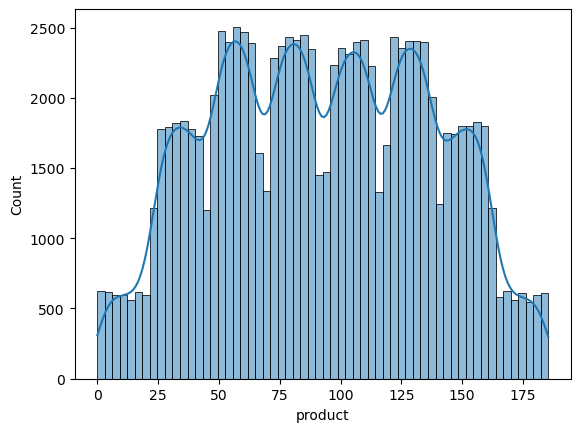

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


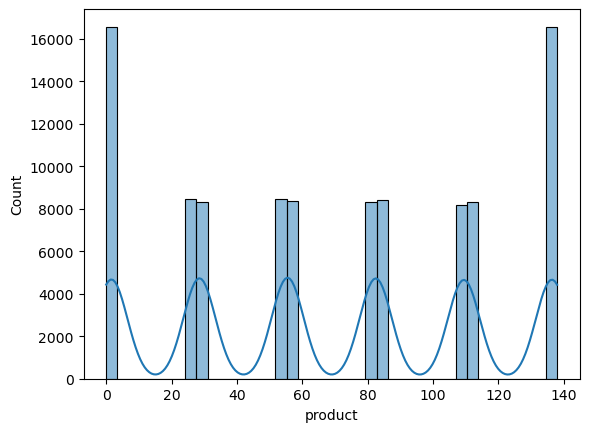

-------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB
None


,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


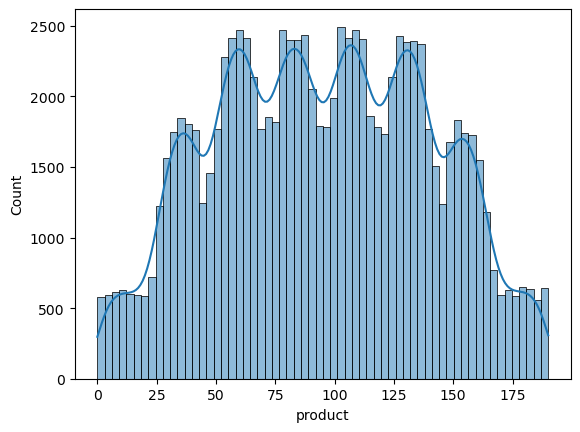

In [6]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')
get_info_reg(data_0)
get_info_reg(data_1)
get_info_reg(data_2)

**Как можно заметить, признак 'f2' оказывает некоторое влияение на целевой признак - 'product' в 0 и 2 регионах, но во 1 регионе это признак вообще коррелирует с целевым признаком. Графики являются мультимодальными.**

**Не знаю нормально это или нет, если смотреть на 2 график, так как не особо похоже на нормальное распределение**

## Обучение и проверка модели

In [7]:
def prep_n_fit(region):
    #разбивка
    train, valid = train_test_split(region, test_size=0.25, random_state=10)
    
    feat_train = train.drop(['product', 'id'], axis=1)
    target_train = train['product']
    
    feat_valid = valid.drop(['product', 'id'], axis=1)
    target_valid = valid['product']

    #обучение
    model = LinearRegression()
    model.fit(feat_train, target_train)
    #предикт и метрика
    pred = model.predict(feat_valid)
    res = mean_squared_error(target_valid, pred)**0.5
    return pred, res, target_valid, model, valid

In [8]:
#регион 0
reg_0_pred, reg_0_res, reg_0_valid, model_0, valid_0 = prep_n_fit(data_0)
print(f'Cредний запас предсказанного сырья: {reg_0_pred.mean()}, RMSE модели: {reg_0_res}')
#регион 1
reg_1_pred, reg_1_res, reg_1_valid, model_1, valid_1 = prep_n_fit(data_1)
print(f'Cредний запас предсказанного сырья: {reg_1_pred.mean()}, RMSE модели: {reg_1_res}')
#регион 2
reg_2_pred, reg_2_res, reg_2_valid, model_2, valid_2 = prep_n_fit(data_2)
print(f'Cредний запас предсказанного сырья: {reg_2_pred.mean()}, RMSE модели: {reg_2_res}')

Cредний запас предсказанного сырья: 92.40702766716484, RMSE модели: 37.85110157276893
Cредний запас предсказанного сырья: 68.83391090949065, RMSE модели: 0.8881427347040072
Cредний запас предсказанного сырья: 94.95733043742045, RMSE модели: 40.04919655050029


### Промежуточный вывод:

**Модель хорошо обучилась.**

**Среднее предсказанных данных почти равны и RMSE почти воспадает с std, кроме 2 региона, уж больно маленький разбос получился у RMSE.**

## Подготовка к расчёту прибыли

In [9]:
#объявим необходимые переменные
BUDGET = 10_000_000_000
PROFIT = 450
RISK = 0.025
BEST_POINTS = 200

In [10]:
#найдем кол-во сырья, которое необходимо для выхода в 0
one_point_budget = BUDGET/BEST_POINTS
vol_prod = one_point_budget/PROFIT
print(vol_prod/1000)
print(data_0['product'].mean())
print(data_1['product'].mean())
print(data_2['product'].mean())

111.11111111111111
92.50000000000001
68.82500000000002
95.00000000000004


## Промежуточный вывод:

**При сравнении необходимого кол-ва сырья для безубыточной разработки скважины и среднего значения по региону был сделан вывод, что в регионах при случайном выборе скважин, объема не хватит, который может принести прибыль.**

In [11]:
def prof(pred, valid, data):
    df = pd.DataFrame({'Skvag': valid, 'Pred': pred})
    df = df.sort_values(by='Pred', ascending=False)
    df_200 = df[:200]['Skvag']
    #print(f'Кол-во тысяч баррелей сырья: {round(data_pro.sum(), 2)}.')
    #print(f'Прибыль за весь объем сырья в 200 лучших скважинах: {round(data_pro.sum()*450/1_000_000, 2)} млрд.руб.\n')
    return df_200

In [12]:
a_0 = prof(reg_0_pred, reg_0_valid, data_0)
print(f'Кол-во тысяч баррелей сырья: {round(a_0.sum(), 2)}.')
print(f'Прибыль за весь объем сырья в 200 лучших скважинах: {round((a_0.sum()*450_000-BUDGET)/1_000_000_000, 2)} млрд.руб.\n')
a_1 = prof(reg_1_pred, reg_1_valid, data_1)#1 регион
print(f'Кол-во тысяч баррелей сырья: {round(a_1.sum(), 2)}.')
print(f'Прибыль за весь объем сырья в 200 лучших скважинах: {round((a_1.sum()*450_000-BUDGET)/1_000_000_000, 2)} млрд.руб.\n')
a_2 = prof(reg_2_pred, reg_2_valid, data_2)#2 регион
print(f'Кол-во тысяч баррелей сырья: {round(a_2.sum(), 2)}.')
print(f'Прибыль за весь объем сырья в 200 лучших скважинах: {round((a_2.sum()*450_000-BUDGET)/1_000_000_000, 2)} млрд.руб.\n')

Кол-во тысяч баррелей сырья: 29750.84.
Прибыль за весь объем сырья в 200 лучших скважинах: 3.39 млрд.руб.

Кол-во тысяч баррелей сырья: 27589.08.
Прибыль за весь объем сырья в 200 лучших скважинах: 2.42 млрд.руб.

Кол-во тысяч баррелей сырья: 27626.42.
Прибыль за весь объем сырья в 200 лучших скважинах: 2.43 млрд.руб.



## Расчёт прибыли и рисков 

In [23]:
def fin_prof_n_risk(valid, model):
    state = np.random.RandomState(10)
    val_1 = []
    c = 0
    min_risk = 0
        
    for i in range(1000):
        boot_data = valid.sample(n=500, replace=True, random_state=state)
        
        boot_data_feat = boot_data.drop(['product', 'id'], axis=1)
        boot_data_target = boot_data['product']
        p = model.predict(boot_data_feat)
        g = prof(p, boot_data_target, boot_data)
    
        val_1.append(g.sum()*450_000-BUDGET)

    for _ in range(len(val_1)):
        if val_1[_] < 0:
            min_risk += 1
    
    val_1 = pd.Series(val_1)
    sns.histplot(val_1, kde=True).set(title='Распределение прибыли', xlabel='млдр.руб.')
    mean = val_1.mean()
    interval = st.t.interval(0.95, len(val_1)-1, mean, val_1.sem())
    
    low = val_1.quantile(0.025)
    high = val_1.quantile(0.975)
    
    print(f'Средняя прибыль: {mean/1000} тыс.руб')
    print(f'С вероятностью 95% прибыль в данном регионе будет составлять от: {low/1000} тыс.руб до: {high/1000} тыс.руб')
    print(f'95%-ый доверительный интервал: от {interval[0]/1000} тыс.руб до {interval[1]/1000} тыс.руб' )
    print(f'Риск убытков составляет: {min_risk/len(val_1)*100}%')
    
    

Средняя прибыль: 393435.0420976312 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -115443.9314301103 тыс.руб до: 898631.6281406801 тыс.руб
95%-ый доверительный интервал: от 377395.677220603 тыс.руб до 409474.4069746594 тыс.руб
Риск убытков составляет: 6.9%


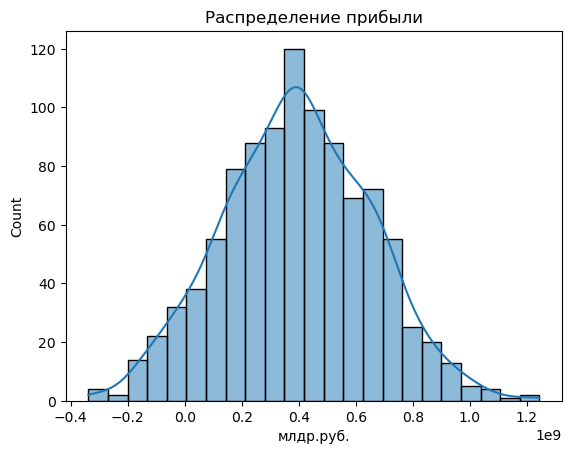

In [24]:
fin_prof_n_risk(valid_0, model_0)

Средняя прибыль: 470698.1424800687 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: 69540.31858103175 тыс.руб до: 867243.8487510529 тыс.руб
95%-ый доверительный интервал: от 457830.18224354996 тыс.руб до 483566.10271658754 тыс.руб
Риск убытков составляет: 1.2%


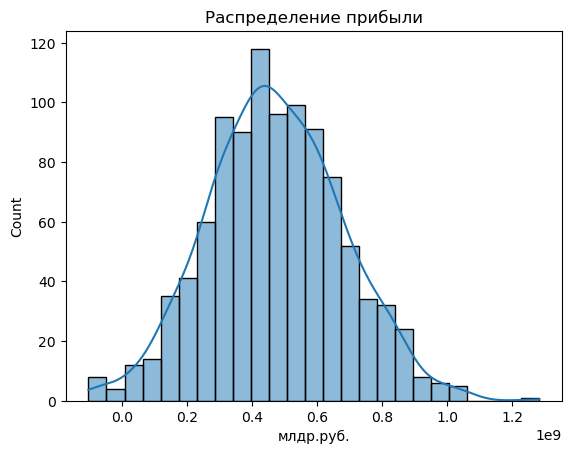

In [25]:
fin_prof_n_risk( valid_1, model_1)

Средняя прибыль: 360506.90238558775 тыс.руб
С вероятностью 95% прибыль в данном регионе будет составлять от: -158739.61648916302 тыс.руб до: 851656.6285834038 тыс.руб
95%-ый доверительный интервал: от 344298.1900528056 тыс.руб до 376715.6147183699 тыс.руб
Риск убытков составляет: 8.5%


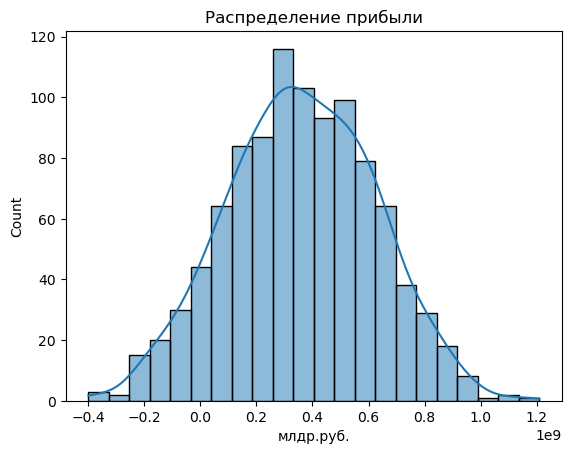

In [26]:
fin_prof_n_risk(valid_2, model_2)

## Вывод:

**Перспективным регионом является регион_1, там выше средняя прибыль и ниже риск убытков по сравнению с другими**